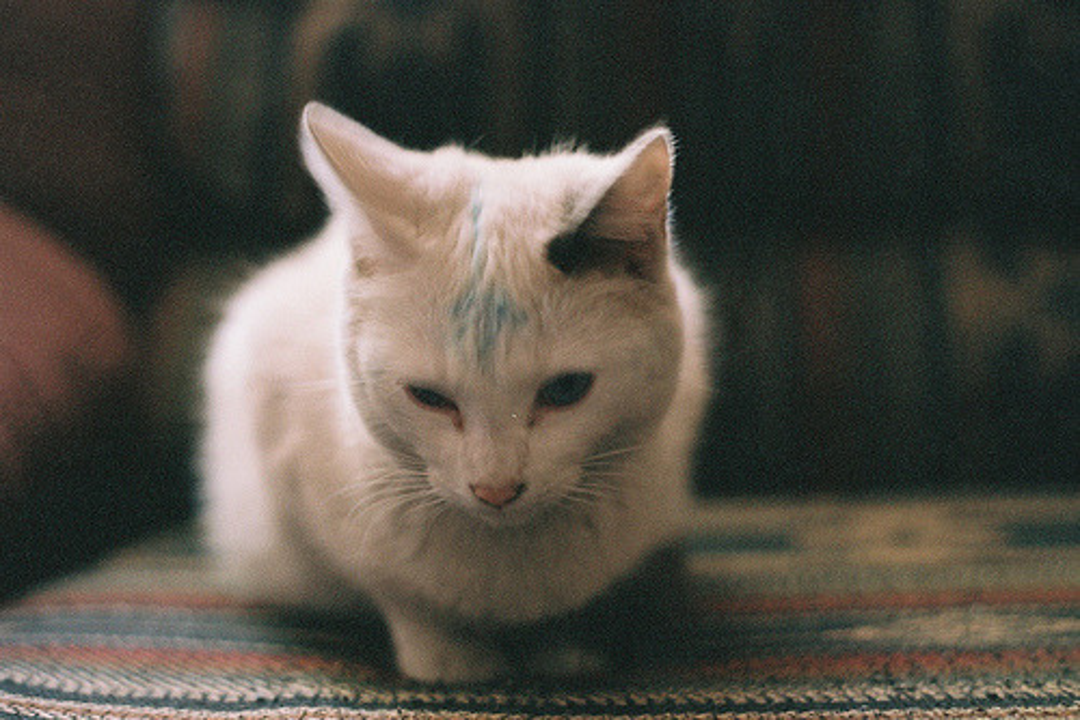

In [75]:
import requests
from PIL import Image
from io import BytesIO


class Cat:
    """Cat object storing the request data and image file from the cat API."""

    def __init__(self, id, url, width, height):
        self.id = id
        self.url = url
        self.width = width
        self.height = height
        self.image = get_cat_image(url)

    def get_image(self) -> Image:
        """Return the image of the cat object, cropped correctly if the width and height are changed.

        Returns:
            Image: Image object that has been edited by the crop function.
        """
        if (self.width, self.height) != self.image.size:
            return self.image.resize((self.width, self.height))
        return self.image


def get_cat_data() -> list[dict]:
    """Fetch a cat from the cat API, return a parsed JSON object.

    Returns:
        list[dict]: Returns the parsed data, the cat API returns a list with length 1 with a dict in it.
    """
    response = requests.get("https://api.thecatapi.com/v1/images/search")
    if response.status_code != 200:
        return None
    return response.json()


def get_cat(cat_json) -> Cat:
    """Create a cat image from a JSON object formatted like the cat API

    Args:
        cat_json (list[dict]): Expects a list with length 1 with a dict in it that contains at least the fields:
        (String) id
        (String) url
        (String) width
        (String) height

    Returns:
        Cat: a Cat object to store all the received data.
    """
    return Cat(
        cat_json[0].get("id"),
        cat_json[0].get("url"),
        cat_json[0].get("width"),
        cat_json[0].get("height"),
    )


def get_cat_image(url) -> Image:
    """Fetch an image of the cat provided, returns an image file.

    Returns:
        Image: An image file parsed with the PIL library, read from a bytestream from the cats API.
    """
    cr = requests.get(url)
    if cr.status_code != 200:
        print(f"Error fetching cat image, error code {cr.status_code}")
        return None
    return Image.open(BytesIO(cr.content))


cat = get_cat(get_cat_data())
cat.height = 720
cat.width = 1080
cat.get_image()

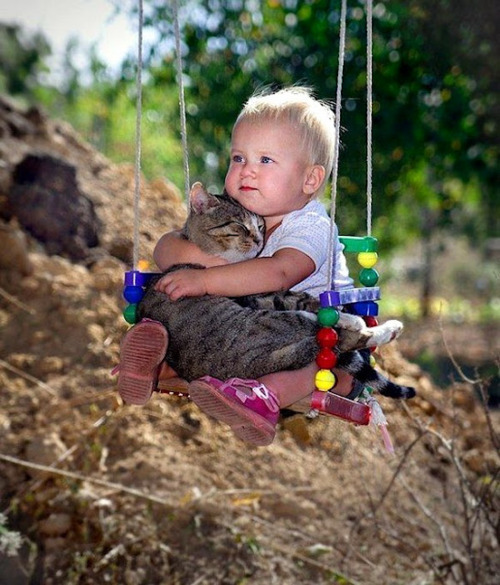

In [74]:
cat.image